In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.signal import find_peaks
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset (assuming it’s in the same directory)
data = pd.read_csv("R02_Data.csv")

# Convert `_time` to datetime for accurate time-based analysis
data["_time"] = pd.to_datetime(data["_time"], errors="coerce").dt.tz_localize(None)

# Display basic info to understand the dataset structure
data.info()
data.head()

C:\Users\Alireza Vaezi\AppData\Local\Temp\ipykernel_48668\3608667315.py:11: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("R02_Data.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974836 entries, 0 to 974835
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   _time                     974630 non-null  datetime64[ns]
 1   I_R02_Gripper_Load        974836 non-null  int64         
 2   I_R02_Gripper_Pot         974836 non-null  int64         
 3   M_R02_BJointAngle_Degree  974836 non-null  float64       
 4   M_R02_LJointAngle_Degree  974836 non-null  float64       
 5   M_R02_RJointAngle_Degree  974836 non-null  float64       
 6   M_R02_SJointAngle_Degree  974836 non-null  float64       
 7   M_R02_TJointAngle_Degree  974836 non-null  float64       
 8   M_R02_UJointAngle_Degree  974836 non-null  float64       
 9   Description               492728 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 74.4+ MB


,_time,I_R02_Gripper_Load,I_R02_Gripper_Pot,M_R02_BJointAngle_Degree,M_R02_LJointAngle_Degree,M_R02_RJointAngle_Degree,M_R02_SJointAngle_Degree,M_R02_TJointAngle_Degree,M_R02_UJointAngle_Degree,Description
0,2023-12-11 13:04:12.348,1299,11695,-0.001373,0.0,-0.001172,0.001953,-0.002151,0.002197,NaN
1,2023-12-11 13:04:12.439,1316,11812,-0.001373,0.0,-0.001172,0.001953,-0.002151,0.002197,NaN
2,2023-12-11 13:04:12.541,1309,11698,-0.001373,0.0,-0.001172,0.001953,-0.002151,0.002197,NaN
3,2023-12-11 13:04:12.637,1320,11777,-0.001373,0.0,-0.001172,0.001953,-0.002151,0.002197,NaN
4,2023-12-11 13:04:12.743,1314,11764,-0.001373,0.0,-0.001172,0.001953,-0.002151,0.002197,NaN


Descriptive Statistics for I_R02_Gripper_Load:
count    974836.00000
mean       1306.58103
std          15.91377
min        1147.00000
25%        1296.00000
50%        1307.00000
75%        1317.00000
max        1474.00000
Name: I_R02_Gripper_Load, dtype: float64

Descriptive Statistics for I_R02_Gripper_Pot:
count    974836.000000
mean      10895.532439
std        2123.800414
min        2001.000000
25%       11601.000000
50%       11642.000000
75%       11680.000000
max       11998.000000
Name: I_R02_Gripper_Pot, dtype: float64


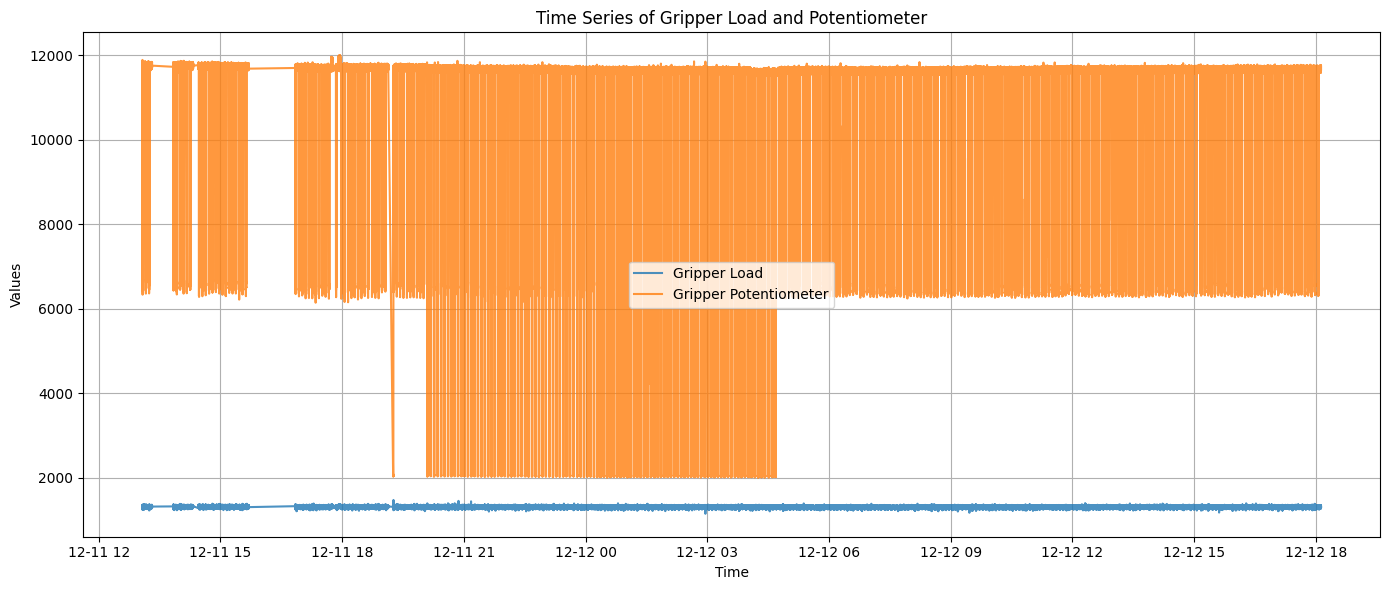

In [2]:
# Basic descriptive statistics for Gripper Load and Potentiometer
print("Descriptive Statistics for I_R02_Gripper_Load:")
print(data["I_R02_Gripper_Load"].describe())

print("\nDescriptive Statistics for I_R02_Gripper_Pot:")
print(data["I_R02_Gripper_Pot"].describe())

# Plot time-series data for Gripper Load and Potentiometer to visualize trends
plt.figure(figsize=(14, 6))
plt.plot(data["_time"], data["I_R02_Gripper_Load"], label="Gripper Load", alpha=0.8)
plt.plot(data["_time"], data["I_R02_Gripper_Pot"], label="Gripper Potentiometer", alpha=0.8)
plt.title("Time Series of Gripper Load and Potentiometer")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

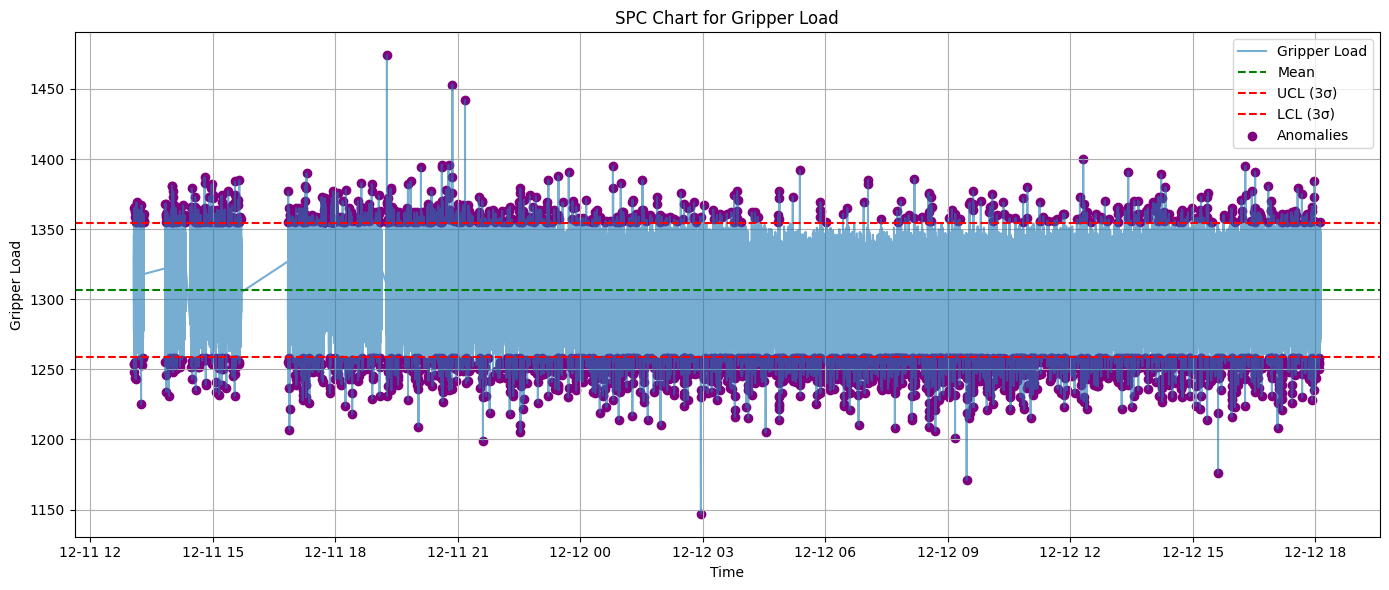

In [3]:
# Calculate SPC metrics for Gripper Load
mean_load = data["I_R02_Gripper_Load"].mean()
std_load = data["I_R02_Gripper_Load"].std()
ucl = mean_load + 3 * std_load  # Upper Control Limit (3σ)
lcl = mean_load - 3 * std_load  # Lower Control Limit (3σ)

# Identify anomalies outside the control limits
data["Load_Anomaly"] = (data["I_R02_Gripper_Load"] > ucl) | (data["I_R02_Gripper_Load"] < lcl)

# Plot SPC chart for Gripper Load with control limits and anomalies highlighted
plt.figure(figsize=(14, 6))
plt.plot(data["_time"], data["I_R02_Gripper_Load"], label="Gripper Load", alpha=0.6)
plt.axhline(mean_load, color="green", linestyle="--", label="Mean")
plt.axhline(ucl, color="red", linestyle="--", label="UCL (3σ)")
plt.axhline(lcl, color="red", linestyle="--", label="LCL (3σ)")
plt.scatter(data["_time"][data["Load_Anomaly"]], data["I_R02_Gripper_Load"][data["Load_Anomaly"]], color="purple", label="Anomalies")
plt.title("SPC Chart for Gripper Load")
plt.xlabel("Time")
plt.ylabel("Gripper Load")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

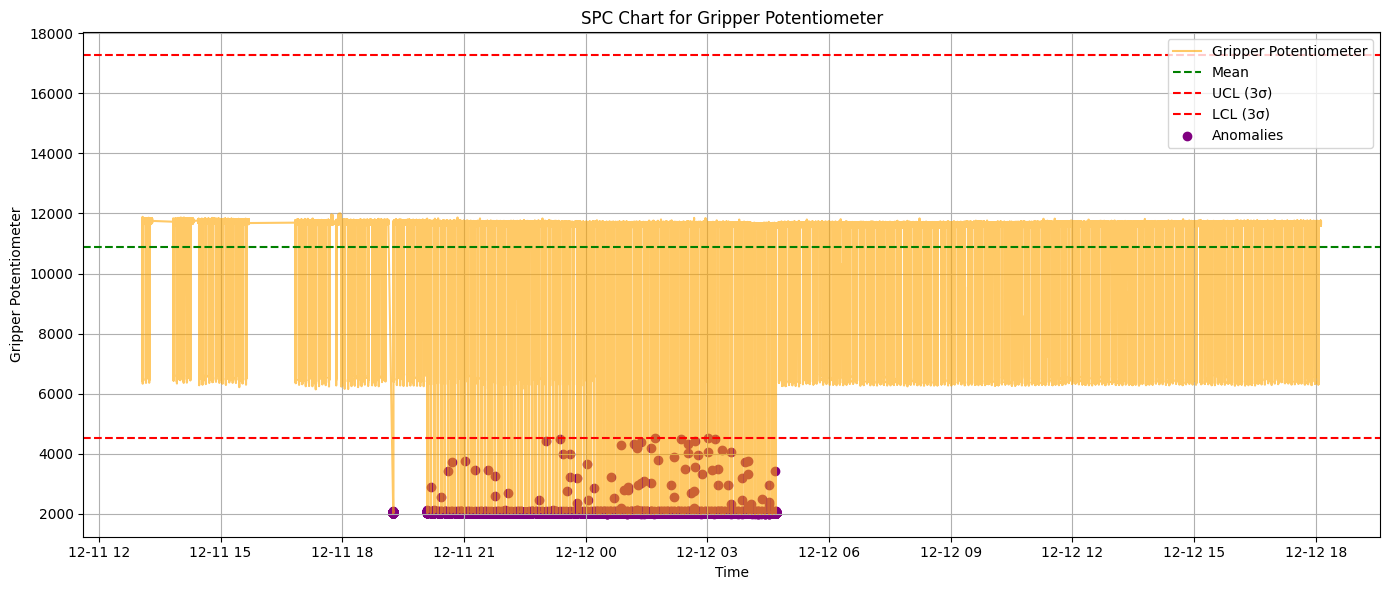

In [4]:
# Calculate SPC metrics for Gripper Potentiometer
mean_pot = data["I_R02_Gripper_Pot"].mean()
std_pot = data["I_R02_Gripper_Pot"].std()
ucl_pot = mean_pot + 3 * std_pot  # Upper Control Limit
lcl_pot = mean_pot - 3 * std_pot  # Lower Control Limit

# Identify anomalies for potentiometer values outside control limits
data["Pot_Anomaly"] = (data["I_R02_Gripper_Pot"] > ucl_pot) | (data["I_R02_Gripper_Pot"] < lcl_pot)

# Plot SPC chart for Potentiometer
plt.figure(figsize=(14, 6))
plt.plot(data["_time"], data["I_R02_Gripper_Pot"], label="Gripper Potentiometer", alpha=0.6, color="orange")
plt.axhline(mean_pot, color="green", linestyle="--", label="Mean")
plt.axhline(ucl_pot, color="red", linestyle="--", label="UCL (3σ)")
plt.axhline(lcl_pot, color="red", linestyle="--", label="LCL (3σ)")
plt.scatter(data["_time"][data["Pot_Anomaly"]], data["I_R02_Gripper_Pot"][data["Pot_Anomaly"]], color="purple", label="Anomalies")
plt.title("SPC Chart for Gripper Potentiometer")
plt.xlabel("Time")
plt.ylabel("Gripper Potentiometer")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

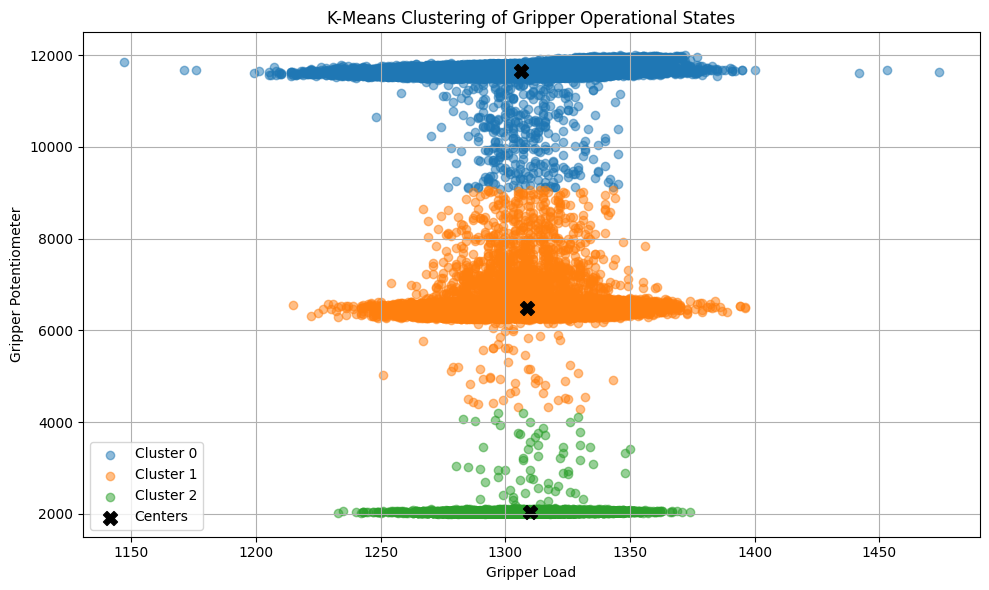

In [5]:
# Select features for clustering
X = data[["I_R02_Gripper_Load", "I_R02_Gripper_Pot"]]

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data["Cluster"] = kmeans.fit_predict(X)

# Plot clustering results with cluster centers
plt.figure(figsize=(10, 6))
for i in range(3):
    cluster_data = data[data["Cluster"] == i]
    plt.scatter(cluster_data["I_R02_Gripper_Load"], cluster_data["I_R02_Gripper_Pot"], label=f"Cluster {i}", alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="black", marker="X", s=100, label="Centers")
plt.xlabel("Gripper Load")
plt.ylabel("Gripper Potentiometer")
plt.title("K-Means Clustering of Gripper Operational States")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

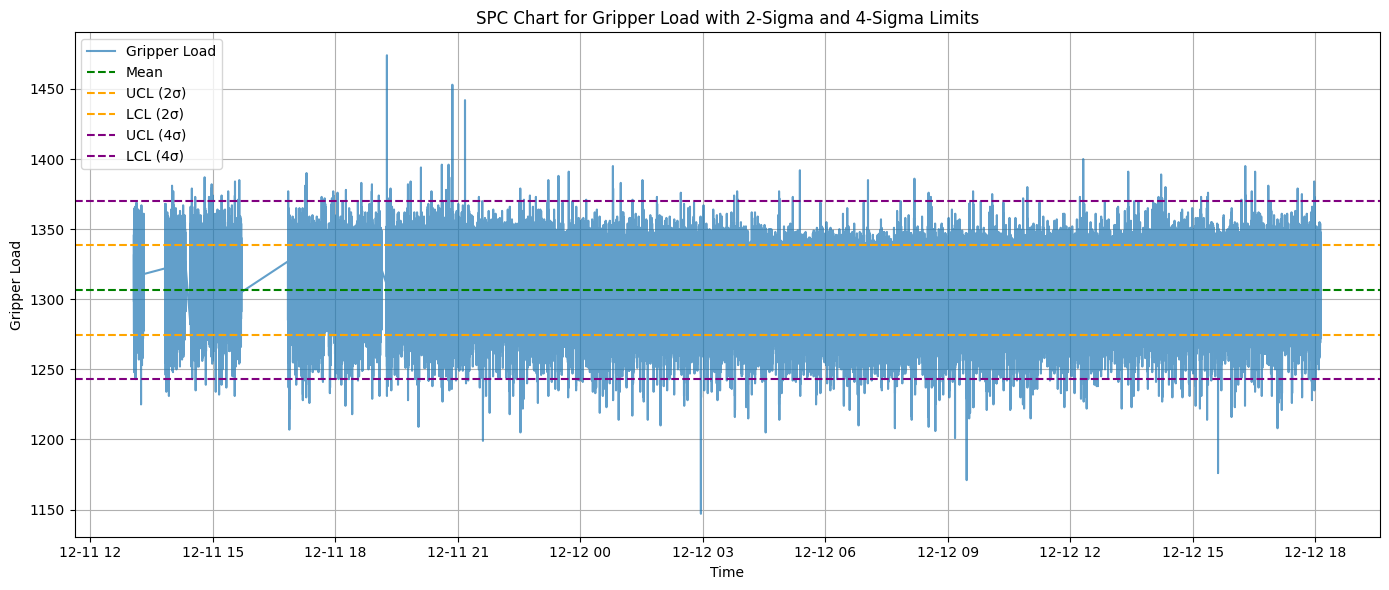

In [6]:
# Calculate 2-sigma and 4-sigma control limits for Gripper Load and Potentiometer
ucl_2sigma_load = mean_load + 2 * std_load
lcl_2sigma_load = mean_load - 2 * std_load
ucl_4sigma_load = mean_load + 4 * std_load
lcl_4sigma_load = mean_load - 4 * std_load

ucl_2sigma_pot = mean_pot + 2 * std_pot
lcl_2sigma_pot = mean_pot - 2 * std_pot
ucl_4sigma_pot = mean_pot + 4 * std_pot
lcl_4sigma_pot = mean_pot - 4 * std_pot

# Plot with multiple control limits
plt.figure(figsize=(14, 6))
plt.plot(data["_time"], data["I_R02_Gripper_Load"], label="Gripper Load", alpha=0.7)
plt.axhline(mean_load, color="green", linestyle="--", label="Mean")
plt.axhline(ucl_2sigma_load, color="orange", linestyle="--", label="UCL (2σ)")
plt.axhline(lcl_2sigma_load, color="orange", linestyle="--", label="LCL (2σ)")
plt.axhline(ucl_4sigma_load, color="purple", linestyle="--", label="UCL (4σ)")
plt.axhline(lcl_4sigma_load, color="purple", linestyle="--", label="LCL (4σ)")
plt.title("SPC Chart for Gripper Load with 2-Sigma and 4-Sigma Limits")
plt.xlabel("Time")
plt.ylabel("Gripper Load")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
import numpy as np


def simulate_arl(mean, std, ucl, lcl, n_simulations=1000):
    # Perform Monte Carlo simulations
    run_lengths = []
    for _ in range(n_simulations):
        length = 0
        while True:
            simulated_point = np.random.normal(mean, std)
            if simulated_point > ucl or simulated_point < lcl:
                break
            length += 1
        run_lengths.append(length)
    return np.mean(run_lengths)


# Calculate ARLs for different sigma levels
arl_2sigma = simulate_arl(mean_load, std_load, ucl_2sigma_load, lcl_2sigma_load)
arl_3sigma = simulate_arl(mean_load, std_load, ucl, lcl)
arl_4sigma = simulate_arl(mean_load, std_load, ucl_4sigma_load, lcl_4sigma_load)

print(f"ARL (2-Sigma): {arl_2sigma}")
print(f"ARL (3-Sigma): {arl_3sigma}")
print(f"ARL (4-Sigma): {arl_4sigma}")

ARL (2-Sigma): 20.334
ARL (3-Sigma): 366.293
ARL (4-Sigma): 15895.817


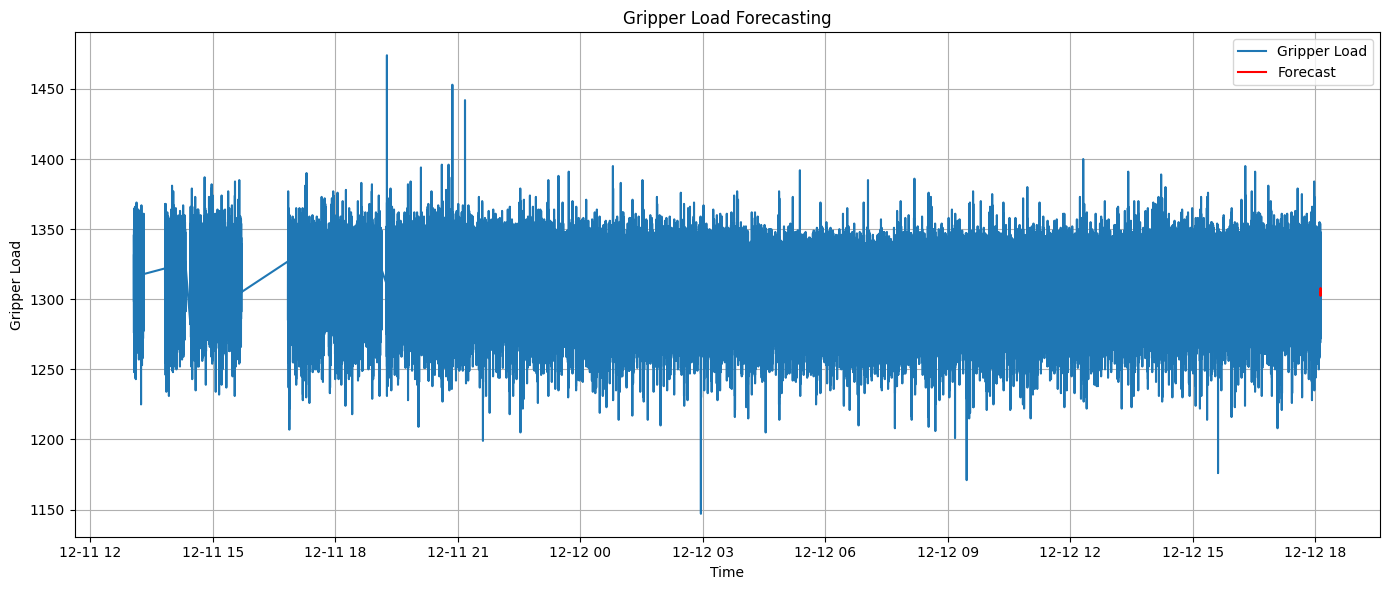

In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Train ARIMA model on Gripper Load
model = ARIMA(data["I_R02_Gripper_Load"], order=(5, 1, 0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=100)

# Plot the forecast
plt.figure(figsize=(14, 6))
plt.plot(data["_time"], data["I_R02_Gripper_Load"], label="Gripper Load")
plt.plot(data["_time"].iloc[-100:], forecast, label="Forecast", color="red")
plt.title("Gripper Load Forecasting")
plt.xlabel("Time")
plt.ylabel("Gripper Load")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


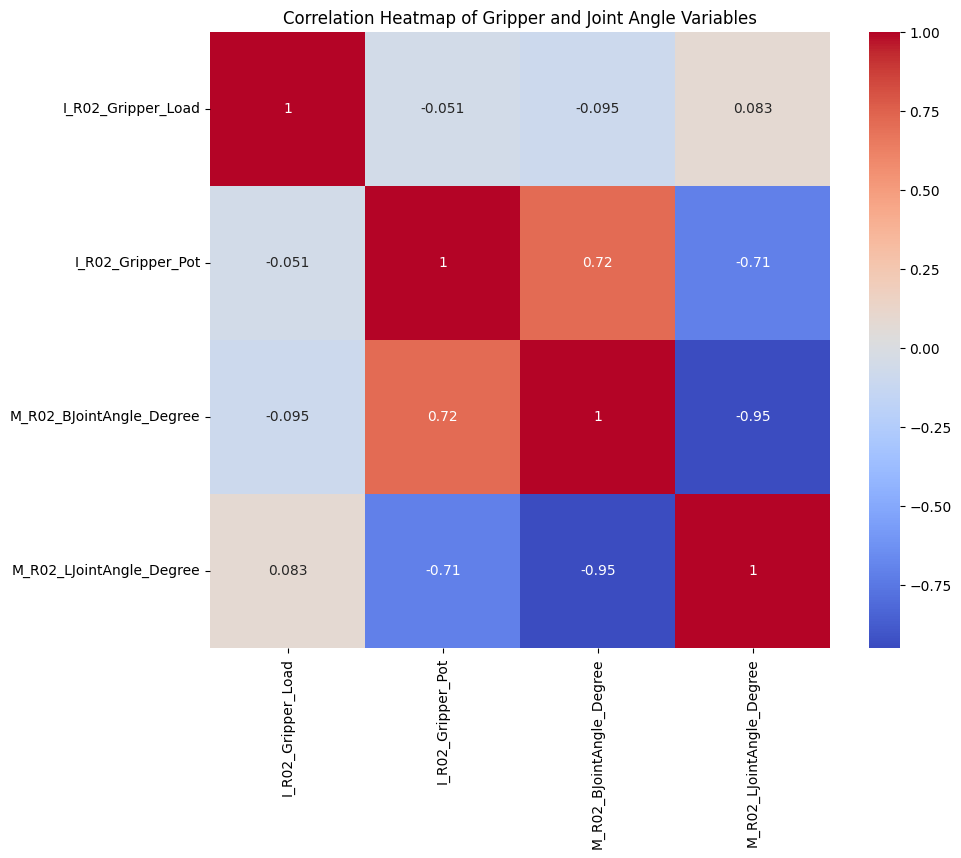

In [10]:
%pip install seaborn
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[["I_R02_Gripper_Load", "I_R02_Gripper_Pot", "M_R02_BJointAngle_Degree", "M_R02_LJointAngle_Degree"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Gripper and Joint Angle Variables")
plt.show()

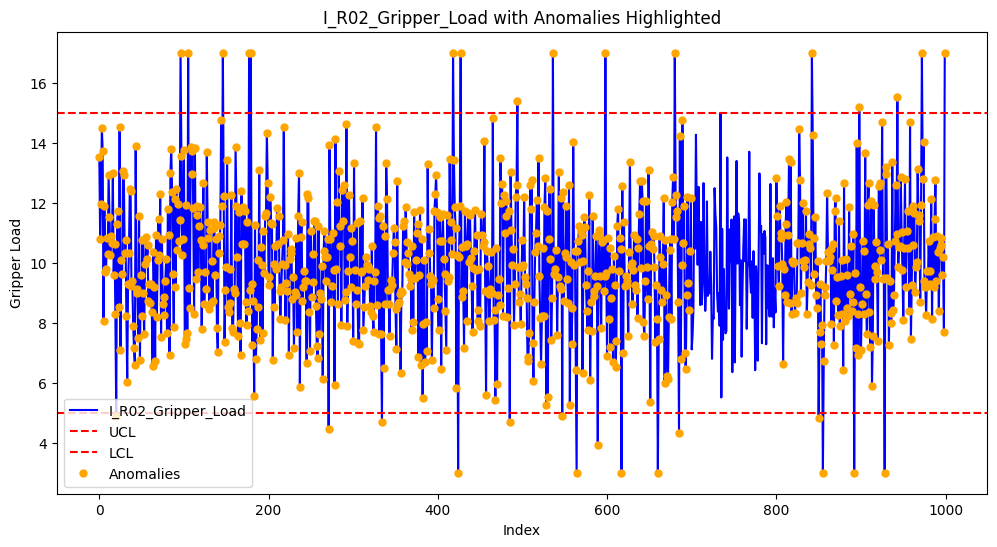

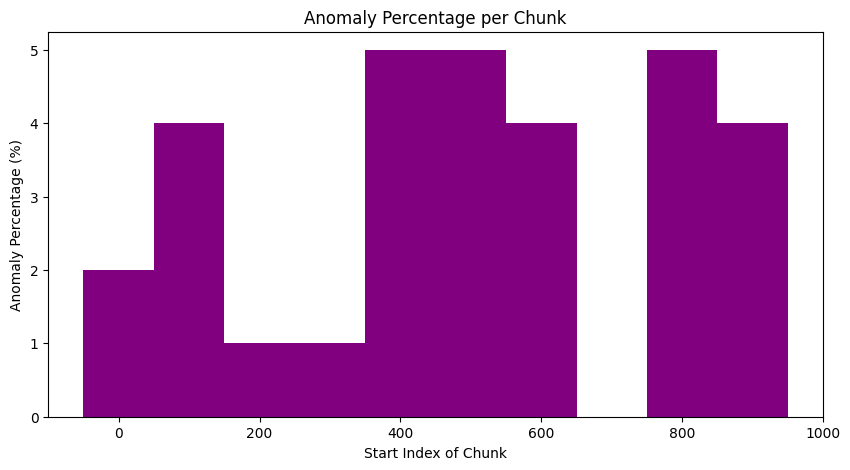

Anomaly Detection Results:
   Start_Index  End_Index  Anomaly_Count  Anomaly_Percentage
0            0        100              2                 2.0
1          100        200              4                 4.0
2          200        300              1                 1.0
3          300        400              1                 1.0
4          400        500              5                 5.0
5          500        600              5                 5.0
6          600        700              4                 4.0
7          700        800              0                 0.0
8          800        900              5                 5.0
9          900       1000              4                 4.0


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate example data (replace this with your actual data)
np.random.seed(0)
data_size = 1000
ucl, lcl = 15, 5
data = pd.DataFrame({"I_R02_Gripper_Load": np.random.normal(loc=10, scale=2, size=data_size)})
anomaly_indices = np.random.choice(data_size, size=20, replace=False)
data.loc[anomaly_indices, "I_R02_Gripper_Load"] = np.random.choice([3, 17], size=20)

# Initialize list to store detected anomalies per chunk
detected_anomalies = []

# Process the data in chunks and store anomalies
chunk_size = 100
for i in range(0, len(data), chunk_size):
    chunk = data.iloc[i : i + chunk_size]
    anomalies = chunk[(chunk["I_R02_Gripper_Load"] > ucl) | (chunk["I_R02_Gripper_Load"] < lcl)]
    detected_anomalies.append((i, i + chunk_size, len(anomalies), len(anomalies) / chunk_size * 100))

# Convert results to a DataFrame for easy viewing
anomaly_detection_results = pd.DataFrame(detected_anomalies, columns=["Start_Index", "End_Index", "Anomaly_Count", "Anomaly_Percentage"])

# Plotting the gripper load data with anomalies highlighted
plt.figure(figsize=(12, 6))
plt.plot(data["I_R02_Gripper_Load"], label="I_R02_Gripper_Load", color="blue")
plt.axhline(ucl, color="red", linestyle="--", label="UCL")
plt.axhline(lcl, color="red", linestyle="--", label="LCL")

# Highlight anomalies
for i, row in anomaly_detection_results.iterrows():
    if row["Anomaly_Count"] > 0:
        start_idx, end_idx = int(row["Start_Index"]), int(row["End_Index"])
        plt.plot(range(start_idx, end_idx), data["I_R02_Gripper_Load"].iloc[start_idx:end_idx], "o", markersize=5, label="Anomalies" if i == 0 else "", color="orange")

plt.title("I_R02_Gripper_Load with Anomalies Highlighted")
plt.xlabel("Index")
plt.ylabel("Gripper Load")
plt.legend()
plt.show()

# Plotting the anomaly percentage per chunk
plt.figure(figsize=(10, 5))
plt.bar(anomaly_detection_results["Start_Index"], anomaly_detection_results["Anomaly_Percentage"], width=chunk_size, color="purple")
plt.title("Anomaly Percentage per Chunk")
plt.xlabel("Start Index of Chunk")
plt.ylabel("Anomaly Percentage (%)")
plt.show()

# Display the anomaly detection results
print("Anomaly Detection Results:")
print(anomaly_detection_results)